In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from matplotlib import style

In [2]:
data = pd.read_csv('C://Users//Shatin//Desktop//MACHINE LEARNING//DataSets//Bank Customer Churn Prediction.csv') 

In [3]:
data.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [5]:
data.columns

Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn'],
      dtype='object')

In [6]:
# One-Hot Encoding

# Example DataFrame with string categories
# df = pd.DataFrame({'Category': ['Apple', 'Banana', 'Orange', 'Apple', 'Orange']})

# One-hot encode the 'Category' column
data_encoded = pd.get_dummies(data, columns=['country', 'gender'])

data_encoded.head()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_France,country_Germany,country_Spain,gender_Female,gender_Male
0,15634602,619,42,2,0.00,1,1,1,101348.88,1,True,False,False,True,False
1,15647311,608,41,1,83807.86,1,0,1,112542.58,0,False,False,True,True,False
2,15619304,502,42,8,159660.80,3,1,0,113931.57,1,True,False,False,True,False
3,15701354,699,39,1,0.00,2,0,0,93826.63,0,True,False,False,True,False
4,15737888,850,43,2,125510.82,1,1,1,79084.10,0,False,False,True,True,False


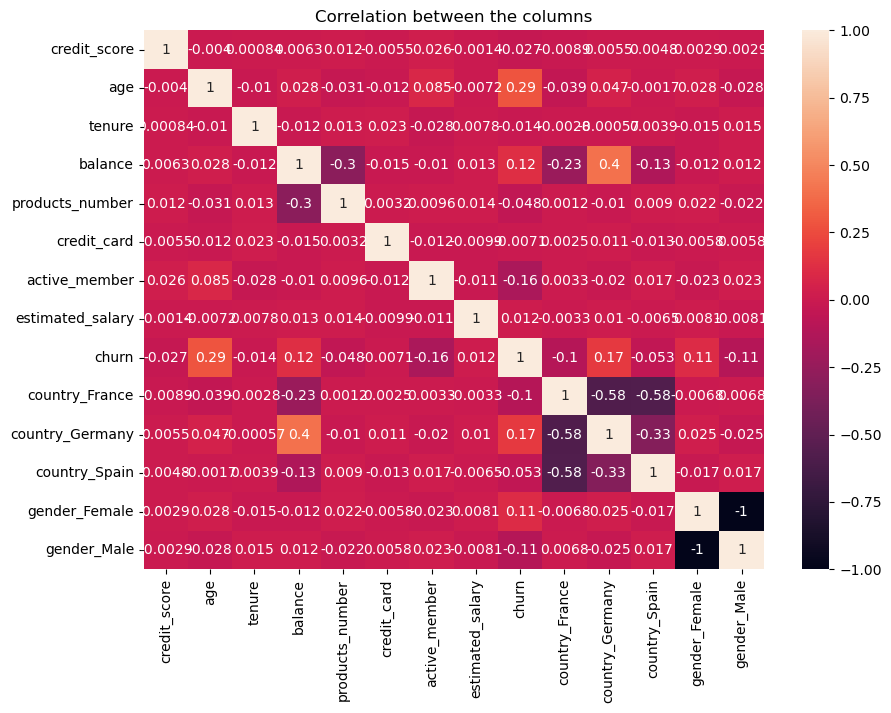

In [7]:
plt.figure(figsize=(10,7))
sns.heatmap(data_encoded.drop('customer_id', axis=1).corr(), annot=True)
plt.title('Correlation between the columns')
plt.show()

In [8]:
X = data_encoded.drop(['customer_id', 'churn'], axis=1)
y = data_encoded['churn']

In [9]:
print("Shape of X is: ",X.shape)
print("Shape of y is: ", y.shape)

Shape of X is:  (10000, 13)
Shape of y is:  (10000,)


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
print("X_test shape:", X_test.shape)
print("X_train shape:", X_train.shape)
print("y_test shape: ", y_test.shape)
print("y_train shape:", y_train.shape)

X_test shape: (3000, 13)
X_train shape: (7000, 13)
y_test shape:  (3000,)
y_train shape: (7000,)


In [12]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
leniearModel = LinearRegression()
leniearModel.fit(X_train, y_train)

LinearRegression()

In [21]:
y_pred = leniearModel.predict(X_test)

In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("Mean Absolute Error: ", (metrics.mean_absolute_error(y_pred, y_test)))
print("Mean Squared Error: ", (metrics.mean_squared_error(y_pred, y_test)))
print("R² score: ", (metrics.r2_score(y_pred, y_test)))

Mean Absolute Error:  0.2825540491365921
Mean Squared Error:  0.13304966316672986
R² score:  -4.609874781600352


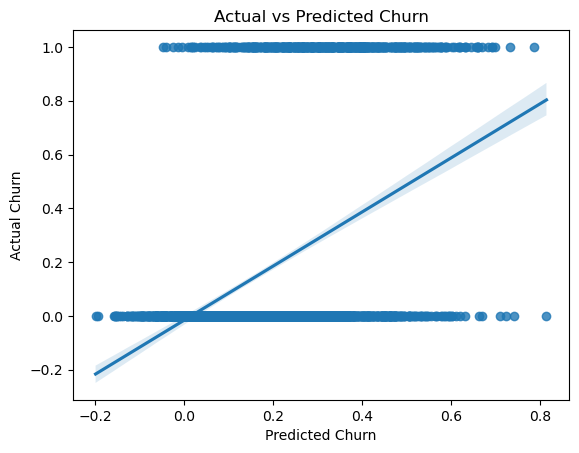

In [23]:
sns.regplot(x=y_pred, y=y_test)
plt.xlabel("Predicted Churn")
plt.ylabel('Actual Churn')
plt.title("Actual vs Predicted Churn")
plt.show()

In [24]:
logisticModel = LogisticRegression()
logisticModel.fit(X_train, y_train)

LogisticRegression()

In [30]:
y_pred = logisticModel.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [31]:
logisticModel.score(X_test,y_test)

0.8113333333333334

In [35]:
probabilities = logisticModel.predict_proba(X_test)

# Display the first 20 values
print(probabilities[:20])

[[0.75141287 0.24858713]
 [0.92013782 0.07986218]
 [0.68113488 0.31886512]
 [0.56522314 0.43477686]
 [0.93250358 0.06749642]
 [0.95534546 0.04465454]
 [0.73245069 0.26754931]
 [0.79008501 0.20991499]
 [0.67261504 0.32738496]
 [0.69346559 0.30653441]
 [0.7409546  0.2590454 ]
 [0.47294411 0.52705589]
 [0.7892032  0.2107968 ]
 [0.45202208 0.54797792]
 [0.97897494 0.02102506]
 [0.73550239 0.26449761]
 [0.68705717 0.31294283]
 [0.79850322 0.20149678]
 [0.91453692 0.08546308]
 [0.79234418 0.20765582]]


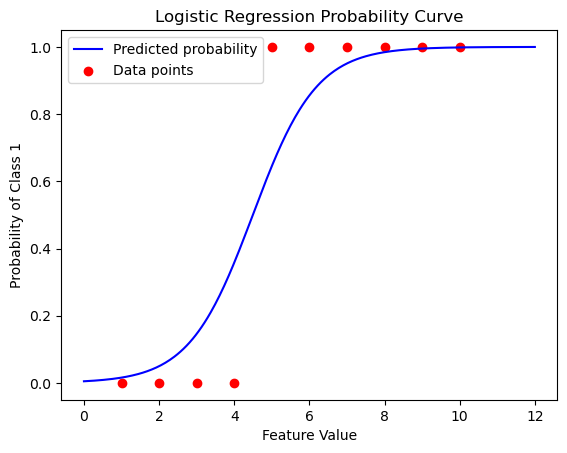

In [36]:
# Example data: single feature and binary target
X = np.array([[1], [2], [3], [4], [5], [6], [7], [8], [9], [10]])  # Single feature
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])  # Binary target

# Train logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(X, y)

# Generate predictions over a range of values for the feature
X_test = np.linspace(0, 12, 300).reshape(-1, 1)  # Generate 300 points between 0 and 12
y_prob = logistic_model.predict_proba(X_test)[:, 1]  # Probability for class 1

# Plot the probability curve
plt.plot(X_test, y_prob, color='blue', label='Predicted probability')
plt.scatter(X, y, color='red', label='Data points')

# Add labels and legend
plt.title('Logistic Regression Probability Curve')
plt.xlabel('Feature Value')
plt.ylabel('Probability of Class 1')
plt.legend()

# Show plot
plt.show()

In [45]:
# From ChatGPT

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

df = pd.DataFrame(data)

# Step 2: Prepare the data
X = df.drop(columns=['customer_id', 'churn'])  # Features
y = df['churn']  # Target variable

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Train the Logistic Regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train_scaled, y_train)

# Step 6: Make predictions
y_pred = logistic_model.predict(X_test_scaled)

# Optional: Check the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Step 7: View the predicted probabilities for the first 20 samples
probabilities = logistic_model.predict_proba(X_test_scaled)
print("Predicted probabilities for the first 20 samples:\n", probabilities[:20])


Accuracy: 1.0
Predicted probabilities for the first 20 samples:
 [[0.68231993 0.31768007]]


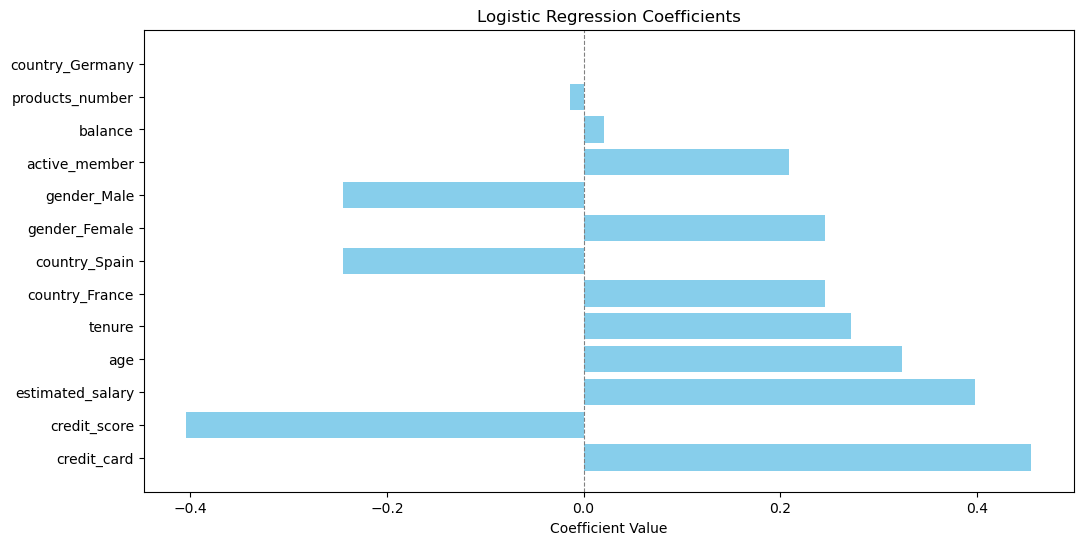

In [46]:
# Assuming logistic_model has been trained and X_train is your features DataFrame
coefficients = logistic_model.coef_[0]  # Get the coefficients for the features
feature_names = X.columns  # Get the feature names

# Create a DataFrame to hold features and their coefficients
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort the DataFrame by the absolute value of coefficients
coef_df['abs_coefficient'] = np.abs(coef_df['Coefficient'])
coef_df = coef_df.sort_values(by='abs_coefficient', ascending=False)

# Plotting
plt.figure(figsize=(12, 6))
plt.barh(coef_df['Feature'], coef_df['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.title('Logistic Regression Coefficients')
plt.axvline(0, color='grey', lw=0.8, ls='--')
plt.show()